In [1]:
from bs4 import BeautifulSoup
from splinter import Browser

In [2]:
# create instance
browser = Browser("chrome")

url ="https://www.statmuse.com/nba/ask?q=nba+players+all-time+leaders+in+total+3+pointers"
browser.visit(url)

html = browser.html
html

'<html lang="en"><head><meta charset="utf-8"><meta name="color-scheme" content="light only"><meta content="width=device-width, initial-scale=1.0" name="viewport"><meta name="format-detection" content="telephone=no"><meta name="generator" content="Astro v4.4.8"><meta name="apple-itunes-app" content="app-id=1234654160"><title>NBA Players All-time Leaders In Total 3 Pointers | StatMuse</title><meta name="description" content="Stephen Curry has drained the most career threes, with 3,747 three-pointers."><meta name="keywords" content="StatMuse, sports, stats, search, sports search, sports information, sports stats, statistics, fantasy stats, advanced stats, betting information, NBA stats, NFL stats, NHL stats, PGA stats, MLB stats, Premier League stats"><meta property="fb:app_id" content="915991831757165"><meta property="og:site_name" content="StatMuse"><meta property="og:title" content="NBA Players All-time Leaders In Total 3 Pointers | StatMuse"><meta property="og:description" content="St

In [3]:
soup = BeautifulSoup(html, "html.parser")


In [4]:
target = soup.find("tbody",class_="divide-y divide-[#c7c8ca] leading-[22px]")

In [5]:
all_player_block = target.find_all("tr")

combined_player_info = []

# Iterate through all <tr> tags within the HTML
for i in range(len(all_player_block)):
    # Get name
    name_tag = all_player_block[i].find("a")
    
    # Check if the <a> tag exists and has the title attribute
    if name_tag is not None and 'title' in name_tag.attrs:
        # Get the value of the title attribute
        player_name = name_tag.attrs['title']

        # Get all player stats for the current player block
        player_all_stat = all_player_block[i].find_all("td", class_="text-right px-2 py-1")

        player_info = [player_name]  # Create a list with player name as first item

        for stat in player_all_stat:
            player_info.append(stat.text)
        
        # Append the player info list to the combined player info list
        combined_player_info.append(player_info)
    else:
        print("Error")



In [6]:
# Create DataFrame
import pandas as pd

columns = ["PlayerName", "3PM", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK", "TOV", "FGM", "FGA", "FG%", "3PA", "3P%", "FTM", "FTA", "FT%", "PF", "+/-", "MPG", "PPG", "RPG", "APG", "SPG", "BPG", "TPG"]

df = pd.DataFrame(combined_player_info, columns=columns)
df

,PlayerName,3PM,GP,MIN,PTS,REB,AST,STL,BLK,TOV,...,FT%,PF,+/-,MPG,PPG,RPG,APG,SPG,BPG,TPG
0,Stephen Curry,"3,747",956,"32,724","23,668","4,509","6,119","1,473",235,"2,987",...,91.0,"2,215",+5878,34.2,24.8,4.7,6.4,1.5,0.2,3.1
1,Ray Allen,"2,973","1,300","46,344","24,505","5,272","4,361","1,451",244,"2,709",...,89.4,"2,858",+3491,35.6,18.9,4.1,3.4,1.1,0.2,2.1
2,James Harden,"2,940","1,072","37,222","25,885","6,017","7,629","1,597",600,"3,919",...,86.1,"2,695",+4262,34.7,24.1,5.6,7.1,1.5,0.6,3.7
3,Damian Lillard,"2,607",842,"30,520","21,151","3,573","5,659",804,257,"2,379",...,89.7,"1,611",+2364,36.2,25.1,4.2,6.7,1.0,0.3,2.8
4,Reggie Miller,"2,560","1,389","47,619","25,279","4,182","4,141","1,505",299,"2,409",...,88.8,"2,730",+2015,34.3,18.2,3.0,3.0,1.1,0.2,1.7
5,Klay Thompson,"2,481",793,"25,842","15,531","2,795","1,843",676,413,"1,336",...,85.8,"1,624",+3914,32.6,19.6,3.5,2.3,0.9,0.5,1.7
6,Kyle Korver,"2,450","1,232","31,183","11,953","3,643","2,114",804,403,"1,290",...,87.7,"2,522",+2861,25.3,9.7,3.0,1.7,0.7,0.3,1.0
7,LeBron James,"2,410","1,492","56,598","40,474","11,185","11,009","2,275","1,111","5,211",...,73.6,"2,682",+7443,37.9,27.1,7.5,7.4,1.5,0.7,3.5
8,Vince Carter,"2,290","1,541","46,367","25,728","6,606","4,714","1,530",888,"2,590",...,79.8,"3,995",+1817,30.1,16.7,4.3,3.1,1.0,0.6,1.7
9,Jason Terry,"2,282","1,410","42,034","18,881","3,274","5,415","1,603",275,"2,415",...,84.5,"2,577",+1718,29.8,13.4,2.3,3.8,1.1,0.2,1.7


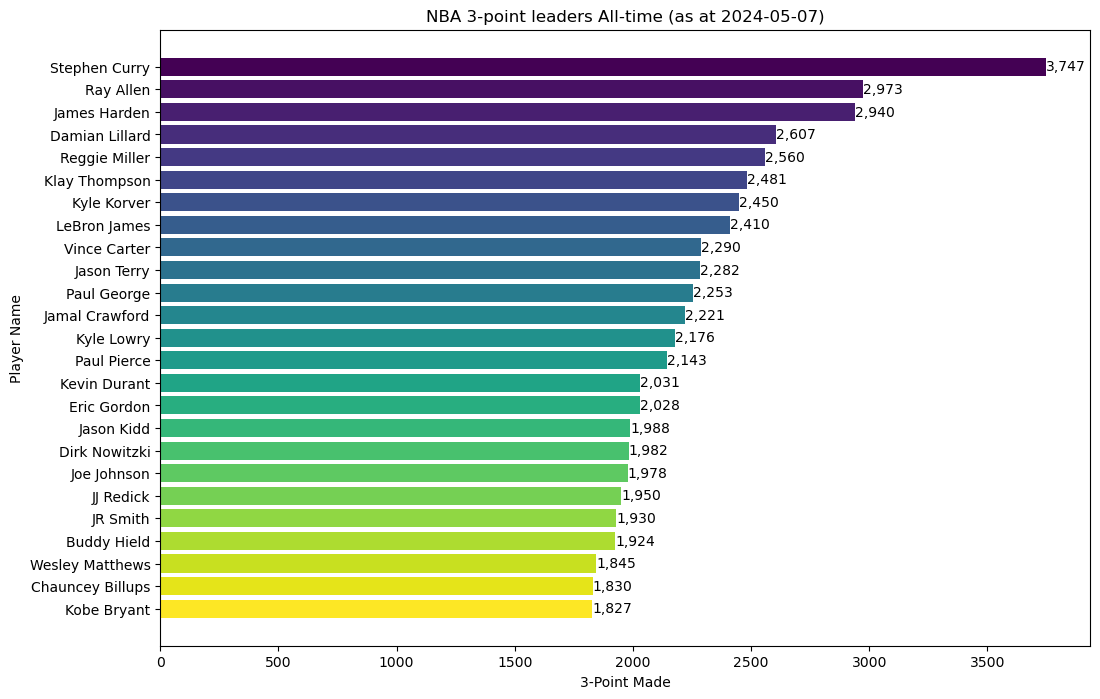

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Get today's date
today_date = datetime.date.today()

df = pd.DataFrame(combined_player_info, columns=columns)

# Convert '3PM' and '3PA' columns to numeric
df['3PM'] = df['3PM'].str.replace(',', '').astype(int)
df['3PA'] = df['3PA'].str.replace(',', '').astype(int)

# Sort DataFrame by '3PM'
df = df.sort_values(by='3PM', ascending=False)

# Create a color map for each player
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(df['PlayerName'], df['3PM'], color=colors)

# Add labels and title
plt.xlabel('3-Point Made')
plt.ylabel('Player Name')
plt.title(f'NBA 3-point leaders All-time (as at {today_date})')


# Invert y-axis to have the player with the most 3PM on top
plt.gca().invert_yaxis()

# Display numbers on bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             va='center', ha='left', color='black')
    
# Save the chart as a JPG image
plt.savefig('nba_3point_leaders.jpg', format='jpg', bbox_inches='tight')

plt.show()


In [8]:
browser.quit()